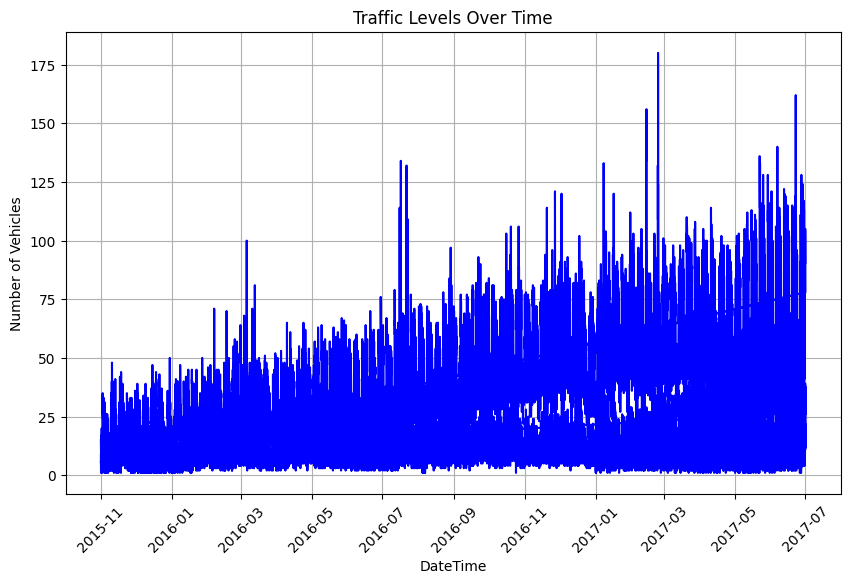

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("traffic.csv")

data['DateTime'] = pd.to_datetime(data['DateTime'])

plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'], data['Vehicles'], color='blue')
plt.title('Traffic Levels Over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

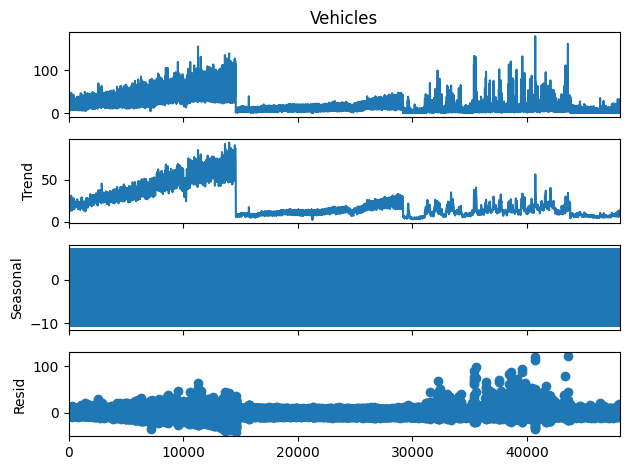

In [17]:
result = seasonal_decompose(data['Vehicles'], model='additive', period=24)
result.plot()
plt.show()

In [18]:
X = data[['Junction']]
y = data['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([14.239468, 13.742359, 13.742359, ..., 14.239468,  7.257294,
       14.239468], dtype=float32)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 202.91930394447388


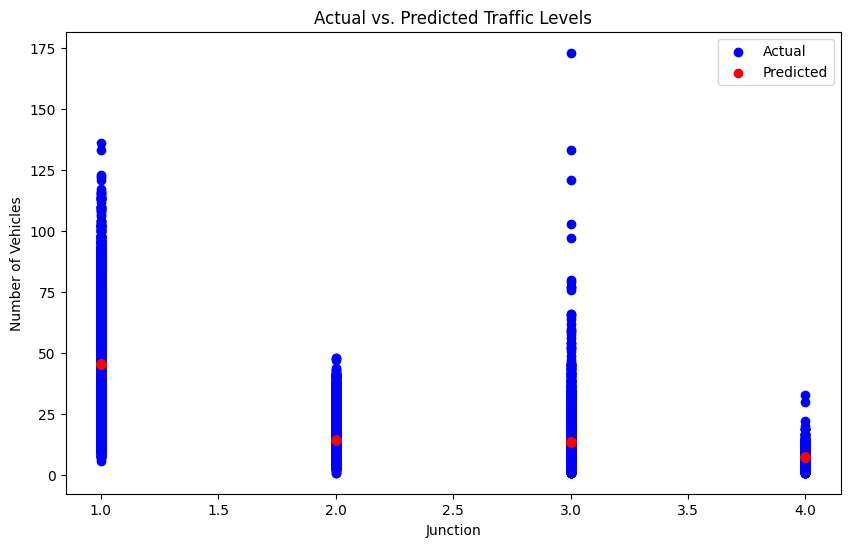

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Traffic Levels')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

Random Forest Mean Squared Error: 202.9126430040479


In [21]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R^2 Score:", r2_rf)

Random Forest R^2 Score: 0.5021119760580164


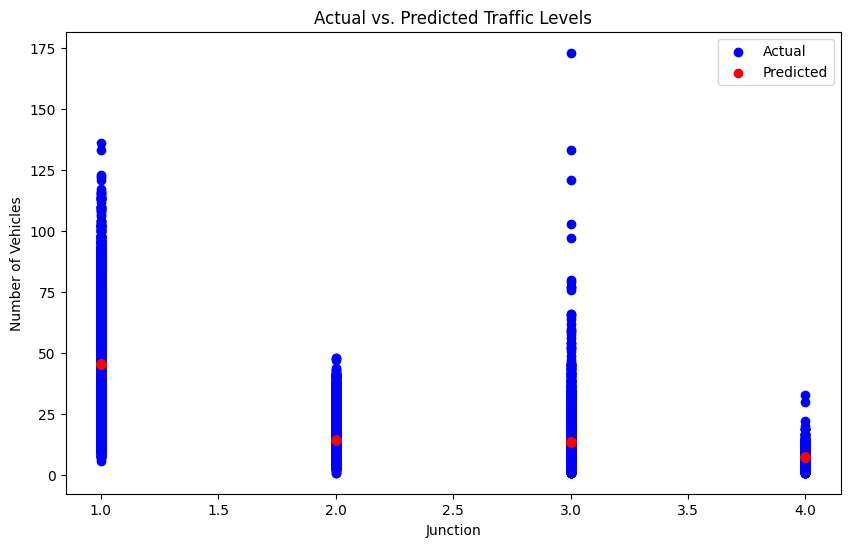

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted')
plt.title('Actual vs. Predicted Traffic Levels')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()